# analyse de marée, cas synthétique

On fait l'hypothèse que le signal est la somme d'un bruit et de signaux aux fréquences harmoniques de marée:
$$
\begin{align}
y_i = b_0 + \sum_c \beta_c \cos \big ( \omega_c t_i - \phi_c \big) + e_i
\end{align}
$$
où $c$ désigne le constituent de marée (M2, S2, O1, K1, etc ...), $b_0$ est ...

Les inconnues recherchées sont $\beta_c$ et les $\phi_c$.
On résout le problème grâce une méthode des moindres carrés.
Il faut amener l'équation sous la bonne forme:

$$
\begin{align}
y_i &= b_0 + \sum_c \beta_c \cos \phi_c \cos \omega_c t_i 
+ \beta_c \sin \phi_c \sin \omega_c t_i 
+ e_i \\
&= b_0 + \sum_c a_c \cos \omega_c t_i 
+ b_c \sin \omega_c t_i 
+ e_i 
\end{align}
$$


$$
\begin{align}
y_i &= b_0 + \sum_c \beta_c \cos \phi_c \cos \omega_c t_i 
+ \beta_c \sin \phi_c \sin \omega_c t_i 
+ e_i \\
&= b_0 + \sum_c a_c \cos \omega_c t_i 
+ b_c \sin \omega_c t_i 
+ e_i 
\end{align}
$$

Il s'agit donc maintenant de résoudre le problème matriciel suivant:

$$
\begin{align}
\mathbf{Y} = \mathbf{X} \mathbf{B}
\end{align}
$$

où les matrices $\mathbf{Y},\mathbf{X},\mathbf{B}$ sont données par:
...


La solution minimisant la norme au carré des erreurs est donnée par:
$$
\begin{align}
\mathbf{B} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}' \mathbf{Y}
\end{align}
$$



Documentation:
    
- [xarray](http://xarray.pydata.org/en/stable/index.html)

- [normal distributions](https://en.wikipedia.org/wiki/Normal_distribution)

- recherche sur google

In [3]:
import xarray as xr
import pandas as pd
import numpy as np

from datetime import datetime,timedelta

%matplotlib inline
import matplotlib.pyplot as plt

## génère des données synthétiques

In [4]:
t = pd.date_range('2000-01-01', freq='H', periods=365 * 24)
time = xr.DataArray((t-t[0])/pd.Timedelta('1D'), \
                    dims=['time']).rename('time')
constituents = xr.DataArray(['M2','S2'],dims=['constituents']) #.rename('constituents')
omega = xr.DataArray([1.9322,2.], dims=['constituents'], coords={'constituents': constituents})

# vrais amplitude, phase
beta = (xr.DataArray([1.,.5], dims=['constituents'], 
                    coords={'constituents': constituents})
        .rename('beta'))
phi = (xr.DataArray([0.,0.], dims=['constituents'], 
                  coords={'constituents': constituents}).rename('phi'))

y_tide = beta*np.cos(2.*np.pi*omega*time+phi)

In [5]:
y_tide

<xarray.DataArray (constituents: 2, time: 8760)>
array([[1.00000000e+00, 8.74763515e-01, 5.30422413e-01, ...,
        9.97401953e-01, 8.37585254e-01, 4.67976087e-01],
       [5.00000000e-01, 4.33012702e-01, 2.50000000e-01, ...,
        5.66649074e-15, 2.50000000e-01, 4.33012702e-01]])
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'
  * time          (time) float64 0.0 0.04167 0.08333 0.125 ... 364.9 364.9 365.0

### illustration du signal de marée, cycle vive eau/ morte eau

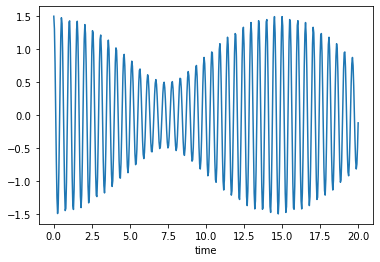

In [6]:
y_tide.sum('constituents').sel(time=slice(0,20)).plot()

## generation du bruit

In [7]:
noise_level = 1.
N_realisations = 100
noise = (xr.DataArray(noise_level*np.random.randn(time.size, N_realisations), 
                      coords={'time':time},
                      dims=['time','realisation'])
        )

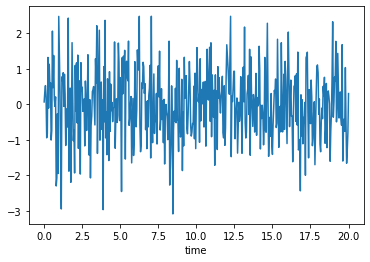

In [8]:
noise.isel(realisation=0).sel(time=slice(0,20)).plot()

In [9]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `numpy.random.standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argu

In [10]:
Y = y_tide.sum('constituents') + noise
Y

<xarray.DataArray (time: 8760, realisation: 100)>
array([[ 1.56514954,  1.24989913,  1.40317987, ...,  2.54427923,
         1.2388902 ,  0.85599852],
       [ 1.6532435 ,  1.27399362,  2.44952332, ...,  2.74171462,
         3.64532639,  1.2103742 ],
       [ 1.30492702,  0.61848417,  1.52246051, ...,  1.06711816,
         2.39145109, -0.48817754],
       ...,
       [ 0.82488021,  1.38367357,  0.1531247 , ...,  0.06676394,
        -0.09941767,  0.98678046],
       [ 0.76134245, -0.26906584,  0.92944034, ...,  0.6053736 ,
         0.40186585,  2.00302423],
       [-0.01924994,  3.74465778,  1.31335907, ...,  2.56434773,
         1.515446  ,  0.95022825]])
Coordinates:
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 364.9 364.9 365.0
Dimensions without coordinates: realisation

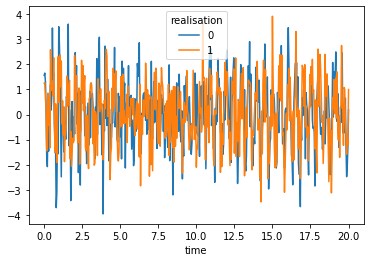

In [11]:
Y.isel(realisation=slice(0,2)).sel(time=slice(0,20)).plot.line(x='time')

In [12]:
X = np.hstack((np.ones((time.size,1)), 
               np.cos(2.*np.pi*omega*time).values.T, 
               np.sin(2.*np.pi*omega*time).values.T))

In [13]:
def get_solution(X, Y):
    B = np.linalg.lstsq(X,Y.values)[0]
    Nc = int((B.shape[0]-1)/2)
    ds = xr.Dataset({'b0': (['realisations'], B[0,:]),
                     'a': (['realisations','constituents'], B[1:Nc+1,:].T),
                     'b': (['realisations','constituents'], B[Nc+1:,:].T)}, 
                     coords={'constituents': constituents})
    return ds

ds = get_solution(X,Y)
ds

/Users/aponte/.miniconda3/envs/sandbox/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


<xarray.Dataset>
Dimensions:       (constituents: 2, realisations: 100)
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'
Dimensions without coordinates: realisations
Data variables:
    b0            (realisations) float64 0.003551 0.008964 ... -0.00216
    a             (realisations, constituents) float64 0.9836 0.5147 ... 0.5115
    b             (realisations, constituents) float64 0.00556 ... -0.01552

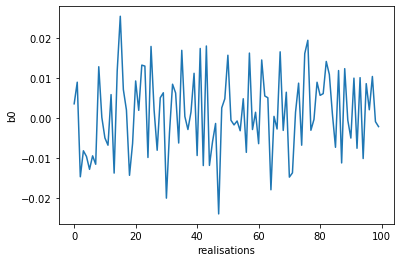

In [14]:
ds.b0.plot()

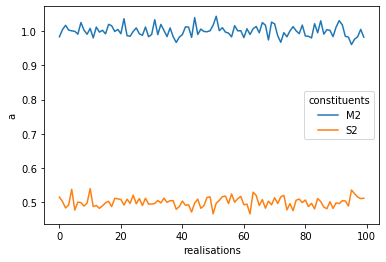

In [15]:
ds.a.plot.line(x='realisations')

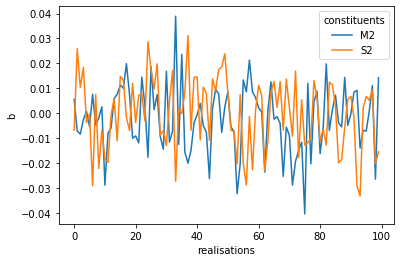

In [16]:
ds.b.plot.line(x='realisations')

---

## de manière plus compact

In [35]:
def solve_pb(amplitudes, noise_level, dt=1/24., T=360, N_realisations=100):
    
    # timle interval
    t_start = datetime(2000, 1, 1)
    t_end = t_start+timedelta(T)
    t = pd.date_range(start=t_start, end=t_end, freq=timedelta(dt))
    time = xr.DataArray((t-t[0])/pd.Timedelta('1D'), \
                        dims=['time']).rename('time')

    # vrais amplitude, phase
    beta = (xr.DataArray(amplitudes, dims=['constituents'], 
                        coords={'constituents': constituents})
            .rename('beta'))
    phi = (xr.DataArray([0.,0.], dims=['constituents'], 
                      coords={'constituents': constituents}).rename('phi'))

    y_tide = beta*np.cos(2.*np.pi*omega*time+phi)

    noise = (xr.DataArray(noise_level*np.random.randn(time.size, N_realisations), 
                          coords={'time':time},
                          dims=['time','realisation'])
            )

    Y = y_tide.sum('constituents') + noise

    X = np.hstack((np.ones((time.size,1)), 
               np.cos(2.*np.pi*omega*time).values.T, 
               np.sin(2.*np.pi*omega*time).values.T))
    
    ds = get_solution(X,Y)

    return ds

In [19]:
ds = solve_pb([1., .5], .1)
ds

/Users/aponte/.miniconda3/envs/sandbox/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


<xarray.Dataset>
Dimensions:       (constituents: 2, realisations: 100)
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'
Dimensions without coordinates: realisations
Data variables:
    b0            (realisations) float64 0.0004542 0.0007953 ... 0.0006737
    a             (realisations, constituents) float64 0.999 0.5017 ... 0.4989
    b             (realisations, constituents) float64 0.00128 ... -0.001537

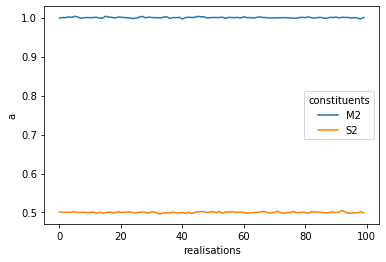

In [20]:
ds.a.plot.line(x='realisations')

# Que calcule-t-on avec les lignes suivantes?

In [28]:
ds.a.std('realisations')

<xarray.DataArray 'a' (constituents: 2)>
array([0.00130004, 0.00153824])
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'

/Users/aponte/.miniconda3/envs/sandbox/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


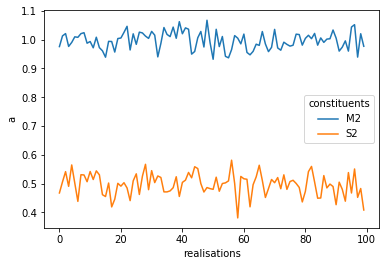

In [46]:
ds = solve_pb([1., .5], .1, dt=20.1)
ds.a.plot.line(x='realisations')